In [1]:
import pandas
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

In [9]:
gene_expression = pandas.DataFrame.from_csv('dataMatrix_PCA_wigo.txt',
                                            encoding='utf-8', sep='\t')
gene_expression.head()

,Health,Health.1,Health.2,Health.3,Health.4,Pneu,Pneu.1,Pneu.2,Pneu.3,Pneu.4,Pneu.5,Cop,Cop.1,Cop.2,Cop.3,Cop.4,Cop.5
PRR29,0.658824,0.948824,1.348824,0.188824,0.458824,0.468824,-0.201176,-0.731176,-0.521176,-0.081176,-0.291176,-0.631176,-0.371176,-0.161176,-0.301176,-0.261176,-0.521176
IL21,0.191765,0.131765,1.021765,0.681765,-0.478235,0.421765,-0.788235,0.171765,1.161765,-0.358235,-0.148235,-0.558235,-0.038235,-0.408235,-0.558235,-0.278235,-0.168235
HTRA1,-1.120000,-1.080000,-1.980000,-2.190000,-2.770000,0.590000,0.040000,2.500000,-0.050000,0.270000,-1.150000,1.990000,-0.590000,1.460000,1.700000,1.760000,0.620000
E2F1,-0.350588,-0.530588,-0.680588,-1.100588,-1.010588,-0.360588,0.909412,-0.140588,1.559412,1.289412,1.509412,0.099412,-0.590588,0.039412,-0.080588,-0.200588,-0.360588
RGCC,1.650588,1.360588,1.130588,0.860588,0.920588,-0.949412,-0.349412,-1.229412,-0.389412,-0.369412,-0.049412,-0.519412,-0.299412,-0.249412,0.350588,-0.359412,-1.509412


In [10]:
pca = PCA(n_components=10)
pca_per_class = pca.fit_transform(gene_expression.transpose())
pca_per_class.shape

(17, 10)

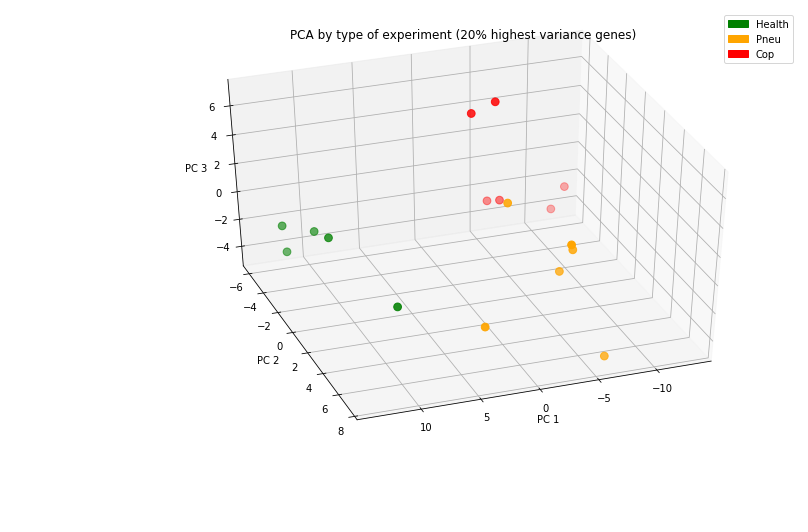

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# get colors for labels
colors = []
labels = []
for names in gene_expression.columns:
    if names.startswith('Health'):
        colors.append('green')
        labels.append('Health')
    elif names.startswith('Pneu'):
        colors.append('orange')
        labels.append('Pneu')
    elif names.startswith('Cop'):
        colors.append('red')
        labels.append('Cop')
    else:
        print ('Group {} not recognized'.format(names))

ax.scatter(pca_per_class[:, 0], pca_per_class[:, 1], pca_per_class[:, 2],
           c=colors, label=labels, s=60)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('PCA by type of experiment (20% highest variance genes)')

# legend
gfpp_patch = mpatches.Patch(color='green', label='Health')
control_patch = mpatches.Patch(color='orange', label='Pneu')
replicate_patch = mpatches.Patch(color='red', label='Cop')
plt.legend(handles=[gfpp_patch, control_patch, replicate_patch])

# annotate names
count = 0
for names in gene_expression.transpose().index:
    plt.annotate(names, (pca_per_class[count, 0], pca_per_class[count, 1]))
    count += 1

ax.view_init(elev=40, azim=70)

fig.savefig('wigo_pca.png')

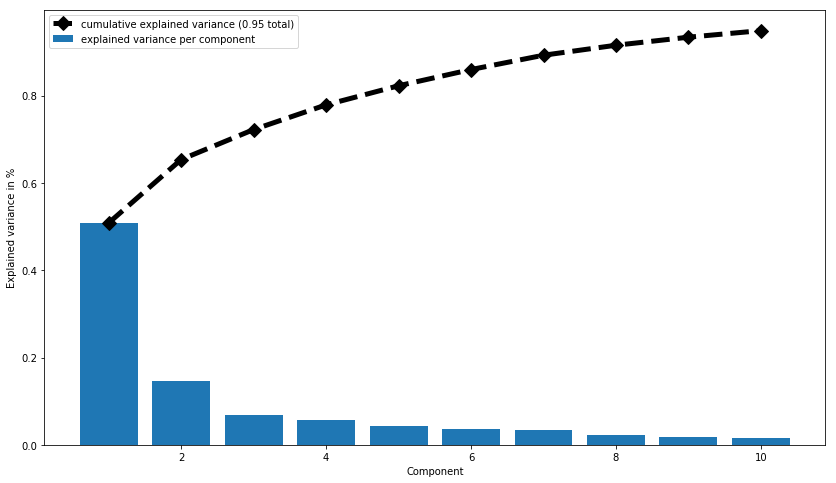

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(14, 8))
x_vals = np.arange(1, pca.n_components+1)
plt.bar(x_vals, pca.explained_variance_ratio_, label='explained variance per component')
plt.plot(x_vals,
         [pca.explained_variance_ratio_[:i+1].sum() for i in range(pca.n_components)],
         color='black',
         lw=5,
         ls='--',
         marker='D',
         markersize=10,
         label='cumulative explained variance ({:.2f} total)'.format(pca.explained_variance_ratio_.sum())
        )
plt.ylabel('Explained variance in %')
plt.xlabel('Component')
leg = plt.legend()
fig.savefig('wigo_explained_variance.png', dpi=150)

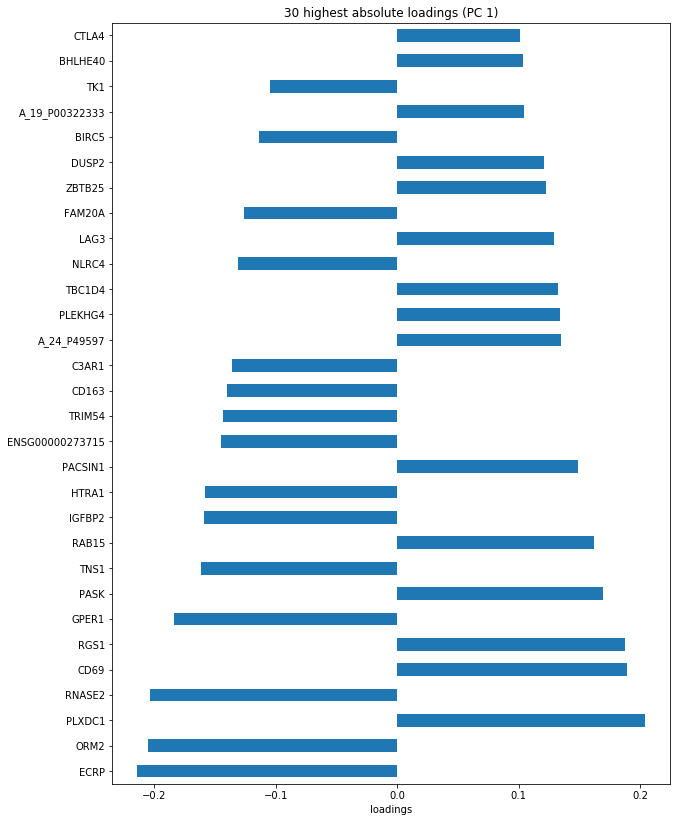

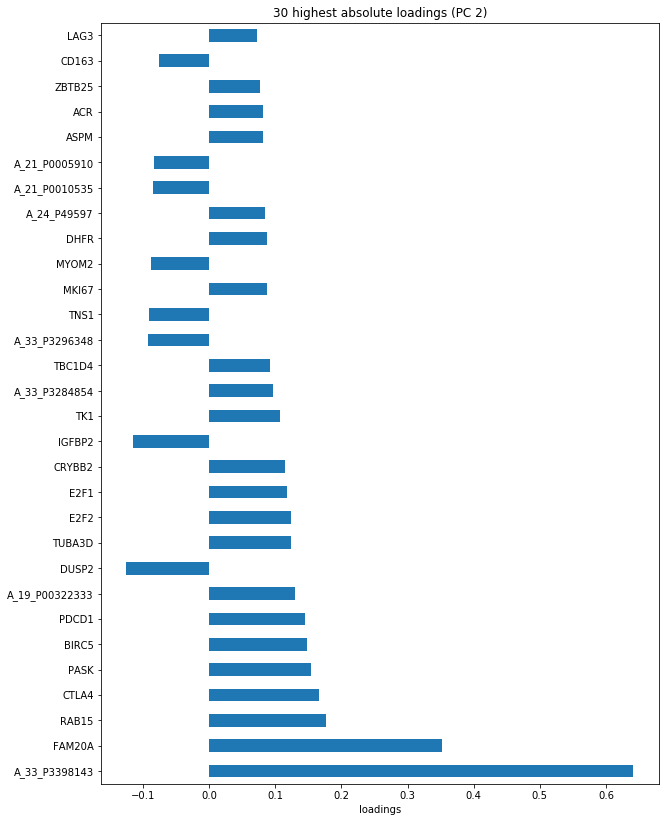

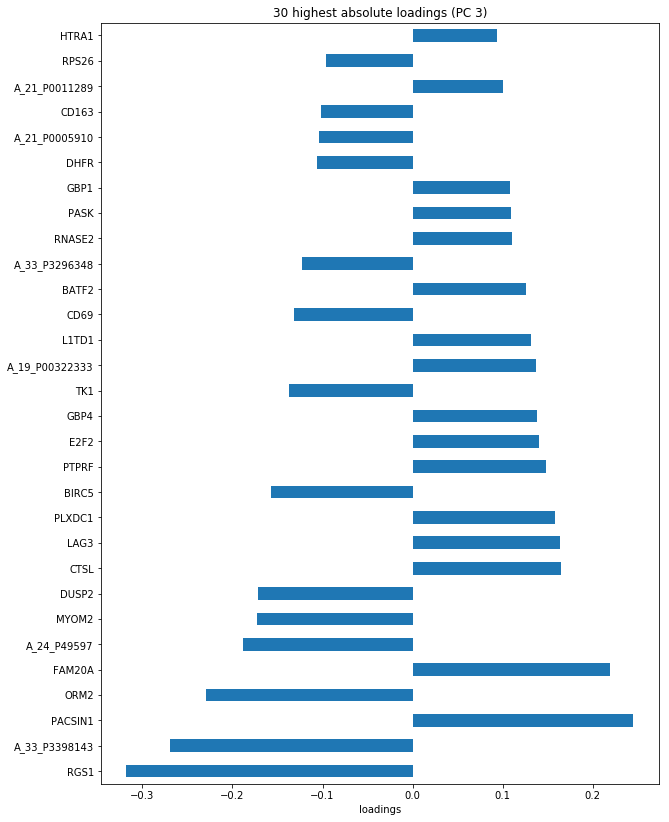

In [21]:
%matplotlib inline

for comp in range(3):
    # extract loadings and their names
    loadings = pca.components_[comp]
    names = gene_expression.index
    loading_df = pandas.DataFrame(loadings, index=gene_expression.index, columns=['Loadings'])
    loading_df['Gene_Name'] = pandas.Series(names, index=loading_df.index)
    loading_df['Abs_Loadings'] = loading_df.Loadings.abs()
    loadings_sorted = loading_df.sort_values(by='Abs_Loadings',
                                             ascending=False)

    # construct loadings plot
    fig = plt.figure(figsize=(10, 14))
    ax = plt.subplot(111)
    top_30_loadings_df = loadings_sorted[:30]
    top_30_loadings_df = top_30_loadings_df.drop('Abs_Loadings', axis=1)
    top_30_loadings_df.plot(kind='barh',
                            legend=False,
                            title='30 highest absolute loadings (PC {})'.format(comp+1),
                            ax=ax
                           )
    ax.set_yticklabels(top_30_loadings_df.Gene_Name)
    ax.set_xlabel('loadings')
    fig.savefig('wigo_loadings_pca_comp{}.png'.format(comp))